In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

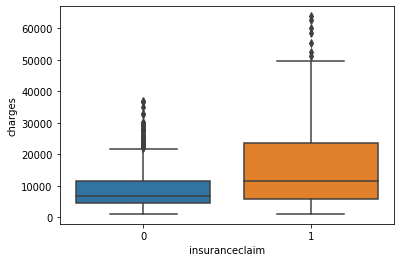

In [16]:
sns.boxplot(data=df,y='charges',x='insuranceclaim')
plt.show()

In [13]:
dic = df.groupby('insuranceclaim').groups
#sns.boxplot(data=df,y='charges',x='insuranceclaim')
dic

{0: Int64Index([   2,    3,    5,    7,    8,    9,   15,   17,   24,   26,
             ...
             1315, 1316, 1318, 1319, 1320, 1324, 1328, 1332, 1333, 1336],
            dtype='int64', length=555),
 1: Int64Index([   0,    1,    4,    6,   10,   11,   12,   13,   14,   16,
             ...
             1323, 1325, 1326, 1327, 1329, 1330, 1331, 1334, 1335, 1337],
            dtype='int64', length=783)}

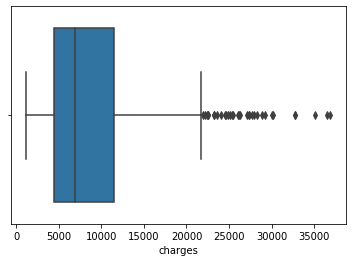

In [15]:
sns.boxplot(data=df.loc[dic[0]],x='charges')
plt.show()

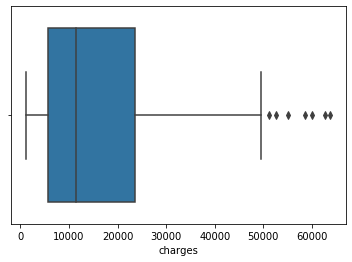

In [17]:
sns.boxplot(data=df.loc[dic[1]],x='charges')
plt.show()

In [18]:
corr  = df.corr()

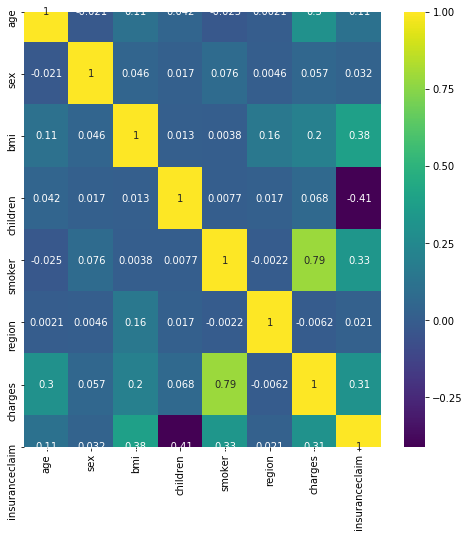

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

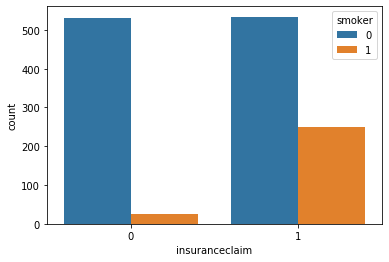

In [24]:
sns.countplot(data=df,x= 'insuranceclaim',hue='smoker')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Train Test Split

In [29]:
# X = df.drop('insuranceclaim',axis=1)
# Y = df['insuranceclaim']

In [31]:
X = df.iloc[:,:-1]   # all column and  minus last column
Y = df.iloc[:,-1]    #add all rows and last column

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# BAse Line Model

In [65]:
lr = LogisticRegression(random_state=1)

In [66]:
lr.fit(X_train,Y_train)

C:\Users\ABHIJEET\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
Y_pred = lr.predict(X_test)

# Evaluation Metrics

In [68]:
accuracy_score(Y_test,Y_pred)

0.8034825870646766

In [69]:
precision_score(Y_test,Y_pred)

0.8192307692307692

In [70]:
recall_score(Y_test,Y_pred)

0.8693877551020408

In [71]:
f1_score(Y_test,Y_pred)

0.8435643564356436

In [72]:
# to get all evaluation matrices in one command
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402



In [74]:
tn, fp, fn, tp =confusion_matrix(Y_test,Y_pred).ravel()

In [75]:
print(tp,fp)
print(fn,tn)

213 47
32 110


In [77]:
lr.predict_proba(X_test)

array([[0.16311278, 0.83688722],
       [0.22470072, 0.77529928],
       [0.19287756, 0.80712244],
       [0.85415655, 0.14584345],
       [0.62188477, 0.37811523],
       [0.19133183, 0.80866817],
       [0.66910355, 0.33089645],
       [0.23193932, 0.76806068],
       [0.27545372, 0.72454628],
       [0.0837364 , 0.9162636 ],
       [0.30559478, 0.69440522],
       [0.5048162 , 0.4951838 ],
       [0.74054617, 0.25945383],
       [0.52984444, 0.47015556],
       [0.18286304, 0.81713696],
       [0.77465306, 0.22534694],
       [0.08742963, 0.91257037],
       [0.91596601, 0.08403399],
       [0.12156556, 0.87843444],
       [0.20253436, 0.79746564],
       [0.20102215, 0.79897785],
       [0.12013125, 0.87986875],
       [0.26341929, 0.73658071],
       [0.32287821, 0.67712179],
       [0.18913769, 0.81086231],
       [0.53205389, 0.46794611],
       [0.91220582, 0.08779418],
       [0.21080607, 0.78919393],
       [0.71718447, 0.28281553],
       [0.2889213 , 0.7110787 ],
       [0.

# Sigmoid Function

In [78]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [79]:
x = np.arange(-10,11)

y = sigmoid(x)

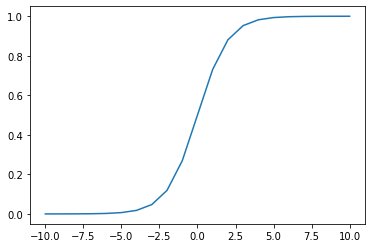

In [80]:
plt.plot(x,y)
plt.show()